# DSL Showcase

### Some initial setup

*Make sure dependencies are there*

In [ ]:
!pip install sqlalchemy numpy networkx matplotlib cycler

**Imports**

In [0]:
from src.observer import SQLObserver
from src.models import Experiment
from src.experiment_runner import run_experiment
from src.visual.plotter import Plotter, preferences
from src.utils.data_reader import SqlReader

### Init experiment

In [12]:

experiment = Experiment(name = "Two confident leaders choose 0",
                        community_size=200,
                        iterations=100, 
                        variants=2)
observer = SQLObserver(experiment)

Graph with 200 nodes and 19900 edges


### Define first leader Alice

In [13]:
alice = experiment.actor(0)
alice.confidence_level = 1.0
alice.dialog_chance = 1.0
alice.chooses(0)

### Define second leader Bob

In [14]:
bob = experiment.actor(1)
bob.confidence_level = 1.0
bob.dialog_chance = 1.0
bob.chooses(0)

### Run the experiment

In [15]:
data_id = run_experiment(experiment, observer)
print("Experiment id:", data_id)

Running experiments, iterations count:  100
Done 0 iterations in 0s
Running time: 17.150977849960327s
Experiment id: 16


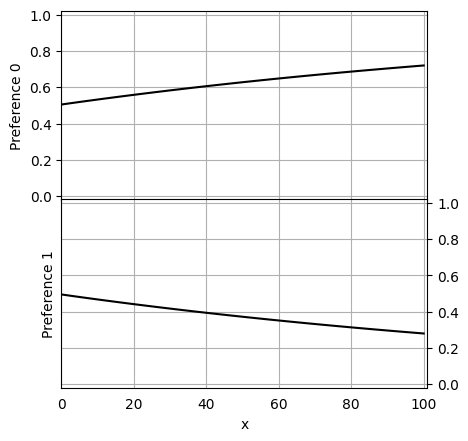

In [16]:
data_reader = SqlReader("sqlite:///experiments.sqlite", data_id)
plotter = Plotter(data_reader, aspect=50)

plotter.plot(
    preferences("Preference 0", 0),
    preferences("Preference 1", 1)
)